In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
#uploading the dataset to the notebook
imdb_df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')


In [37]:
#dataset look
imdb_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [39]:
imdb_df.shape

(15509, 10)

Data Cleaning

In [43]:
imdb_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [45]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [49]:
imdb_df.duplicated().sum()

6

In [51]:
imdb_df.dropna(inplace=True)

In [53]:
imdb_df.shape

(5659, 10)

In [55]:
imdb_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [57]:
imdb_df.drop_duplicates(inplace=True)

In [59]:
imdb_df.shape

(5659, 10)

In [61]:
imdb_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Data Pre-Processing

Data has to be processed to make more easier to derive insights from it and pre-processed will be more suitable while fitting the data into an algorithm
In this project we have processed the data by column wise based on the requirement

In [66]:
#replacing the brackets from year column
imdb_df['Year'] = imdb_df['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [68]:
#remove the min word from 'Duration' column and convert all values to numeric
imdb_df['Duration'] = pd.to_numeric(imdb_df['Duration'].str.replace('min',''))

In [72]:
#Splitting the genre by, to keep only unique genres and replacing the null values with mode
imdb_df['Genre'] = imdb_df['Genre'] = imdb_df['Genre'].str.split(',')
imdb_df = imdb_df.explode('Genre')
imdb_df['Genre'] = imdb_df['Genre'].fillna(imdb_df['Genre'].mode()[0])


In [74]:
#convert 'Votes' to numeric and replace the, to keep only numerical part
imdb_df['Votes'] = pd.to_numeric(imdb_df['Votes'].str.replace(',',''))

In [76]:
#checking the dataset is there any null values present and datatypes of the features present
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


Data Visualising

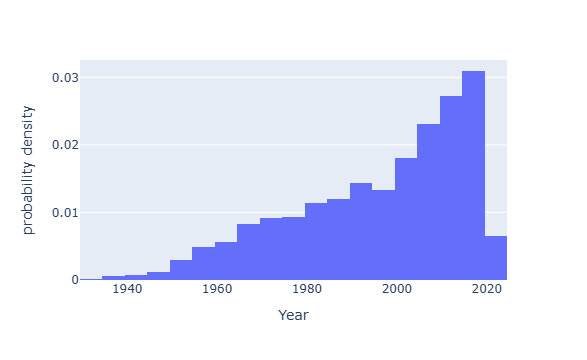

In [81]:
#here we have created a histogram over the years in the data
year = px.histogram(imdb_df, x= 'Year', histnorm='probability density',nbins=30)
year.show()

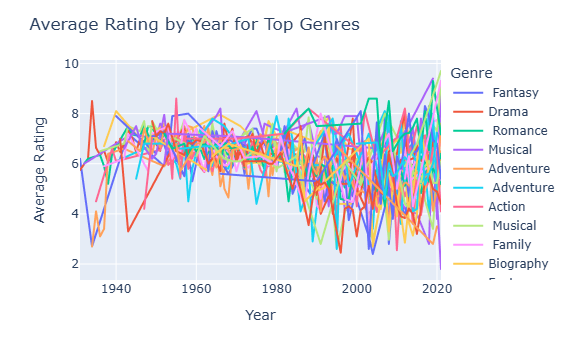

In [85]:
#group data by Year and calculate the average rating
avg_rating_by_year = imdb_df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

#get the top 10 genres
top_genres = imdb_df['Genre'].value_counts().head(10).index

#filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

#create the line plot with Plotly Express
fig = px.line(avg_rating_by_year, x='Year', y='Rating', color="Genre")

#updating the details into chart like title and hue
fig.update_layout(title='Average Rating by Year for Top Genres',xaxis_title='Year', yaxis_title='Average Rating')

#show the plot
fig.show()

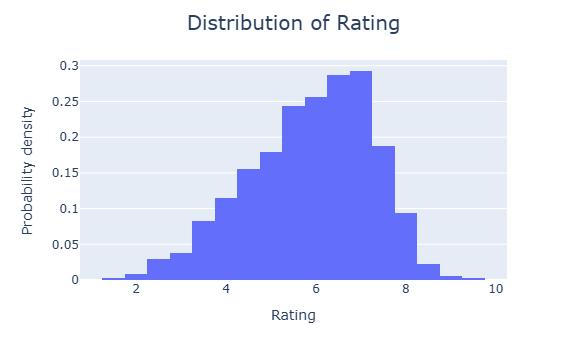

In [95]:
#this histogram shows the distribution of ratings and its probable density

rating_fig = px.histogram(imdb_df, x='Rating', histnorm='probability density', nbins=40)
rating_fig.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20),title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability density')
rating_fig.show()

Feature Engineering

In [98]:
#Importing essential libraries for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score


In [100]:
#dropping name column because it doesn't impact the outcome
imdb_df.drop('Name', axis=1, inplace=True)

In [104]:
#grouping the columns with their average rating and then creating a new feature

genre_mean_rating = imdb_df.groupby('Genre')['Rating'].transform('mean')
imdb_df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb_df.groupby('Director')['Rating'].transform('mean')
imdb_df['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb_df.groupby('Actor 1')['Rating'].transform('mean')
imdb_df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb_df.groupby('Actor 2')['Rating'].transform('mean')
imdb_df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb_df.groupby('Actor 3')['Rating'].transform('mean')
imdb_df['Actor3_encoded'] = actor3_mean_rating





In [106]:
#keeping the predictor and target variable
X = imdb_df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb_df['Rating']

In [110]:
#splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Model Building

In [115]:
#building machine learning model and training them
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [126]:
#Evaluating the performance of model with evaluating metrics

print('The performance of Logistic Regression is below:','\n')
print('Mean squared error:',mean_squared_error(y_test, Model_pred))
print('Mean absolute error:',mean_absolute_error(y_test, Model_pred))
print('R2 score:',r2_score(y_test, Model_pred))

The performance of Logistic Regression is below: 

Mean squared error: 0.44639778808861125
Mean absolute error: 0.4921055068501123
R2 score: 0.7641906900948996


Model Testing

In [129]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.248697,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.838423,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.838739,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.838423,5.335135,4.793617,5.73,5.93
5,1997,827,147,5.875793,5.335135,4.793617,5.73,5.93


In [131]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [139]:
#for testing we create a new dataframe with values close to the any of our existing data tp evaluate

data = {'Year':[2019], 'Votes':[36], 'Duration':[111], 'Genre_mean_rating':[5.8], 'Director_encoded':[5.3], 'Actor1_encoded':[5.3], 'Actor2_encoded':[4.5], 'Actor3_encoded':[4.6]}
trail = pd.DataFrame(data)

In [143]:
#predict the movie rating by entered data
rating_predicted = Model.predict(trail)

#displaying the predicted reult from the Model
print("Prediction Rating:", rating_predicted[0])

Prediction Rating: 4.591586962915884
